# Investigating the movie industry
<font size = 3> In this project, we will be working on a dataset on Kaggle called the TMDB Box Office Prediction. Data set link: https://www.kaggle.com/c/tmdb-box-office-prediction/data. </font> 

# Exploring the dataset 

In [1]:
import pandas as pd 

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
train

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590
2997,2998,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761
2998,2999,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www

# Data Preprocessing

### 1. Removing columns that are not useful.

In [3]:
train[train["homepage"].notnull() == True]["homepage"].head(20)

2                     http://sonyclassics.com/whiplash/
3                            http://kahaanithefilm.com/
6                    http://www.thepossessionmovie.com/
12                        http://www.dreamworks.com/ab/
15                http://skinningmovie.com/synopsis.htm
22                  http://www.magnetreleasing.com/vhs/
23                          http://insightthemovie.com/
24                  http://www.blacksheep-themovie.com/
31                          http://www.cache-derfilm.at
32                 http://www.thelastwitchhunter.movie/
35                          http://www.safethefilm.com/
38                           http://www.watchfinal.com/
40    http://www.magpictures.com/profile.aspx?id=983...
44         https://www.uphe.com/movies/the-wedding-date
46    http://www.iceagemovies.com/films/ice-age-the-...
47                          http://thehatefuleight.com/
50              http://www.moscow-belgium.com/index.php
53                 http://www.imdb.com/title/tt0

In [4]:
# The homepage column contains more than 66% of missing values. And there seems to be no unique information to be extracted from 
# the remaining one, so the column will be removed.

columns_to_drop = ["homepage","poster_path","status","tagline","imdb_id"]
train = train.drop(columns_to_drop,axis=1)

In [5]:
# Do the same to our test data set 
columns_to_drop = ["homepage","imdb_id","poster_path","status","tagline"]
test = test.drop(columns_to_drop,axis=1)

### 2. Transforming features 

### belongs_to_collection
<font size=3> The "belongs to collection" column contains information on which collection does the movie belongs to. It contains null value which signifies that the movie does not belong to any of the collection. 
    
After some investigation of the column, it has been found that only 15% of the movie belong to the collection. Therefore, to make the column useful, I decide to turn the column into categorical, which will state if the movie is part of a collection or not. 

We give the value 1 to movies that belongs to a collection, and 0 that does not. 

In [6]:
import numpy as np
import math

def belongOrNot(value):
    if value == "nan":
        return 0
    else:
        return 1
    
train["belongs_to_collection"] = train["belongs_to_collection"].astype("str")
train["isCollection"] = train["belongs_to_collection"].apply(belongOrNot)
test["belongs_to_collection"] = test["belongs_to_collection"].astype("str")
test["isCollection"] = test["belongs_to_collection"].apply(belongOrNot)

In [7]:
train = train.drop("belongs_to_collection",axis=1)
test = test.drop("belongs_to_collection",axis=1)

<font size=3> Function that extract values from dictionary. Will be used often. </font>

In [8]:
import re
import ast 
def extractFromDict(l,key):
    group = []
    l = ast.literal_eval(l)
    for dictionary in l:
        item = dictionary[key]
        group.append(item)
    return group

### genres
<font size=3> Convert the form of genre column into list form </font>

In [9]:
train["genres"] = train["genres"].fillna("[{'id':999,'name': 'Unknown'}]")
train["genres"] = train["genres"].apply(lambda x: extractFromDict(x,'name'))
test["genres"] = test["genres"].fillna("[{'id':999,'name': 'Unknown'}]")
test["genres"] = test["genres"].apply(lambda x: extractFromDict(x,'name'))

<font size =3> Eventhough some of the movies have more than 1 genre, I decide to only extract the first one to simplify the visualisation task that will be done later on </font> 

In [10]:
train["genres"] = train["genres"].apply(lambda l: l[0])

## Mini Task 1: To investigate which movies genre produces the highest revenue to budget ratio 

<font size=3> 
    Example: <br>
        Budget = 200000 <br>
        Revenue = 400000 <br>
        Revenue to Buget ratio = 2 <br>
</font>

In [11]:
# Imputation : Fill rows which have budget == 0 to the mean of the dataset 

# First get the mean 
gotbudget = train[train["budget"] != 0]
mean = train["budget"].mean()

# 
def fillmean(value):
    if value < 10000:
        return mean
    else:
        return value
    
train["budget"] = train["budget"].apply(fillmean)

In [12]:
train["rtob"] = train["revenue"] / train["budget"]


In [13]:
import matplotlib.pyplot as plt

unique_genres = train["genres"].unique()
all_rtob = []
for genre in unique_genres:
    df = train[train["genres"] == genre]
    mean_rtob = df["rtob"].mean()
    all_rtob.append(mean_rtob)

fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(1,1,1)

ax1.bar(unique_genres,all_rtob)
ax1.set_xticklabels(unique_genres,rotation=90)

plt.xlabel("Genres")
plt.ylabel("revenueTobudgetRatio")

Text(0, 0.5, 'revenueTobudgetRatio')

<font size=3> It seems like there is an outlier in our data, let us find out why <font>

In [14]:
train[(train["genres"] == "Horror") & (train["rtob"] > 10000)]

,id,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title,Keywords,cast,crew,revenue,isCollection,rtob
1230,1231,15000.0,Horror,en,Paranormal Activity,"After a young, middle class couple moves into ...",12.706424,"[{'name': 'Blumhouse Productions', 'id': 3172}...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/14/07,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Paranormal Activity,"[{'id': 10224, 'name': 'haunting'}, {'id': 147...","[{'cast_id': 3, 'character': 'Katie', 'credit_...","[{'credit_id': '52fe4477c3a368484e024b01', 'de...",193355800,1,12890.386667


<font size=3> It seems that the movie Paranormal Activity has a ratio of revenue to budget of 12890!! And after having done some research, the data seems to be legitimate. However, to visualise our result better, we will exclude this row when making the visualisation. <font> 

Text(0, 0.5, 'revenueTobudgetRatio')

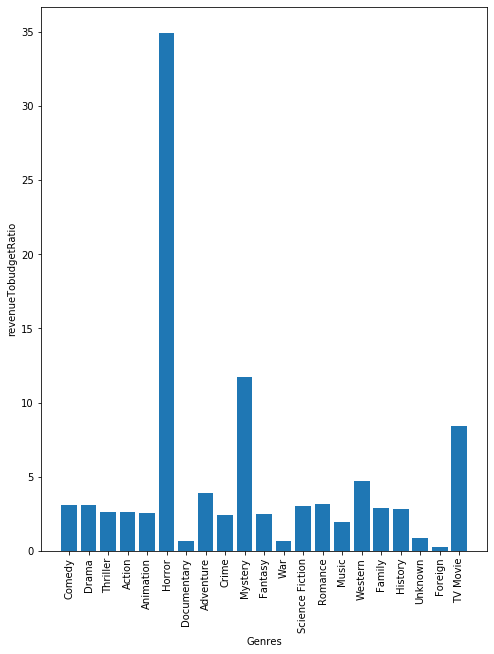

In [15]:
import matplotlib.pyplot as plt

unique_genres = train["genres"].unique()
all_rtob = []
train_no_paranormal = train[train["title"] != "Paranormal Activity"]

for genre in unique_genres:
    df = train_no_paranormal[train_no_paranormal["genres"] == genre]
    mean_rtob = df["rtob"].mean()
    all_rtob.append(mean_rtob)

fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(1,1,1)

ax1.bar(unique_genres,all_rtob)
ax1.set_xticklabels(unique_genres,rotation=90)

plt.xlabel("Genres")
plt.ylabel("revenueTobudgetRatio")

<font size=3> From the graph above, we found that Horror movies often have the highest revenue to budget ratio, on average.</font>

### production_companies


In [16]:
train["production_companies"] = train["production_companies"].fillna("[{'name': 'Unknown'}]")
train["production_companies"] = train["production_companies"].apply(lambda x:extractFromDict(x,'name'))
test["production_companies"] = test["production_companies"].fillna("[{'name': 'Unknown'}]")
test["production_companies"] = test["production_companies"].apply(lambda x:extractFromDict(x,'name'))

### production_countries

In [17]:
train["production_countries"] = train["production_countries"].fillna("[{'iso_3166_1': 'XX', 'name': 'Unknown'}]")
train["production_countries"] = train["production_countries"].apply(lambda x:extractFromDict(x,'name'))
test["production_countries"] = test["production_countries"].fillna("[{'iso_3166_1': 'XX', 'name': 'Unknown'}]")
test["production_countries"] = test["production_countries"].apply(lambda x:extractFromDict(x,'name'))

### spoken_languages

In [18]:
train["spoken_languages"] = train["spoken_languages"].fillna("[{'iso_639_1': 'en', 'name': 'English'}]")
train["spoken_languages"] = train["spoken_languages"].apply(lambda x:extractFromDict(x,'iso_639_1'))
test["spoken_languages"] = test["spoken_languages"].fillna("[{'iso_639_1': 'en', 'name': 'English'}]")
test["spoken_languages"] = test["spoken_languages"].apply(lambda x:extractFromDict(x,'iso_639_1'))

### original_title
<font size=3> The "original title" does not seem to be useful when it comes to predicting box office (as all values are unique). Therefore, transformation has to be done. The column will be transformed to contain the length of the title. </font>

In [19]:
def computeLength(title):
    title_l = title.split()
    return len(title_l)

train["title_length"] = train["original_title"].apply(computeLength)
test["title_length"] = test["original_title"].apply(computeLength)

### cast

In [20]:
train["cast"] = train["cast"].fillna("[{'iso_639_1': 'en', 'name': 'No information'}]")
train["cast"] = train["cast"].apply(lambda x:extractFromDict(x,'name'))
test["cast"] = test["cast"].fillna("[{'iso_639_1': 'en', 'name': 'No information'}]")
test["cast"] = test["cast"].apply(lambda x:extractFromDict(x,'name'))

### dropping repeating columns


In [21]:
columns_to_drop = ["original_language","original_title","overview","Keywords"]
train = train.drop(columns_to_drop,axis=1)
test = test.drop(columns_to_drop,axis=1)

### getting the director name from crew column

In [22]:
def findDirector(l):
    l = ast.literal_eval(l)
    for d in l:
        if d['job'] == 'Director':
            return d['name']

train["crew"] = train["crew"].fillna("[{'id': 99999, 'job': 'Director', 'name': 'No value'}]")
train["director_name"] = train["crew"].apply(findDirector)
test["crew"] = test["crew"].fillna("[{'id': 99999, 'job': 'Director', 'name': 'No value'}]")
test["director_name"] = test["crew"].apply(findDirector)

In [23]:
train = train.drop(['title','crew'],axis=1)
test = test.drop(['title','crew'],axis=1)

## Mini Task 2: Figure out which director has directed the most movies.

In [24]:
director_performance = train["director_name"].value_counts().head(21)
director_performance = director_performance[1:]
director_performance

Clint Eastwood          11
Ron Howard              11
Steven Spielberg        10
Blake Edwards            9
Woody Allen              9
Steven Soderbergh        8
Michael Bay              8
Brian De Palma           8
Martin Scorsese          8
Alfred Hitchcock         8
Francis Ford Coppola     8
Paul W.S. Anderson       8
Wes Craven               8
Tim Burton               7
Michael Mann             7
Peter Hyams              7
Joel Schumacher          7
Ridley Scott             7
Roger Donaldson          7
Robert Rodriguez         7
Name: director_name, dtype: int64

## Mini Task 3: Investigate the trends of the movie industry for the past 40 years 

In [25]:
train = train.dropna()
test = test.dropna()

In [26]:
import datetime as dt 

def returnMonth(d):
    date_dt = dt.datetime.strptime(d,"%m/%d/%y")
    return date_dt.month

def returnYear(d):
    date_dt = dt.datetime.strptime(d,"%m/%d/%y")
    return date_dt.year

train["month_released"] = train["release_date"].apply(returnMonth)
test["month_released"] = test["release_date"].apply(returnMonth)

train["year_released"] = train["release_date"].apply(returnYear)
test["year_released"] = test["release_date"].apply(returnYear)

train = train.drop("release_date",axis=1)
test = test.drop("release_date",axis=1)

<font size =3> The average budget used for a movie <font>

Text(0, 0.5, '10 millions')

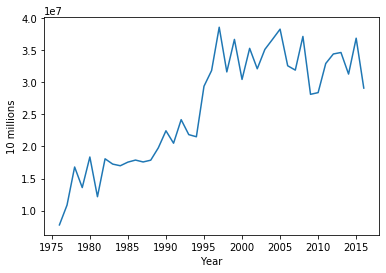

In [27]:
years = [y for y in range(1976,2017)]
year_budget = {}

for y in years:
    df = train[train["year_released"] == y]
    year_budget[y] = df["budget"].mean()

yr_df = pd.DataFrame(year_budget.items(),columns=["Year","average_budget"])

plt.plot(yr_df["Year"],yr_df["average_budget"])
plt.xlabel("Year")
plt.ylabel("10 millions")

<font size =3> The average revenue to budget ratio for a movie <font>

Text(0, 0.5, '100 millions')

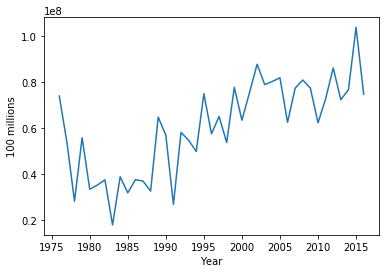

In [28]:
years = [y for y in range(1976,2017)]
year_revenue = {}

for y in years:
    df = train[train["year_released"] == y]
    year_revenue[y] = df["revenue"].mean()

yr_df = pd.DataFrame(year_revenue.items(),columns=["Year","average_revenue"])

plt.plot(yr_df["Year"],yr_df["average_revenue"])
plt.xlabel("Year")
plt.ylabel("100 millions")